In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import os
import shutil


In [ ]:
shutil.copy("/content/drive/MyDrive/DATASET/dataset8020.zip", "/content/dataset8020.zip")

'/content/dataset8020.zip'

In [ ]:

shutil.copy("/content/drive/MyDrive/DATASET/dataTest.zip", "/content/dataTest.zip")

'/content/dataTest.zip'

In [ ]:
! unzip dataset8020.zip
! unzip dataTest.zip

In [ ]:
print(np.__version__)

1.19.5


#Train

In [ ]:
main_dir = '/content/content/dataset'
train_dir = os.path.join(main_dir, 'train')
valid_dir = os.path.join(main_dir, 'val')

test_dir = ('/content/content/Test/')


train_mask_dir = os.path.join(train_dir, 'Mask-samples')
train_nomask_dir = os.path.join(train_dir, 'Non Mask-samples')


In [ ]:
train_mask_names = os.listdir(train_mask_dir)
print(train_mask_names[:10])

train_nomask_names = os.listdir(train_nomask_dir)
print(train_nomask_names[:10])

['490.jpg', '468.jpg', '0502.png', '0559.jpg', '177.jpg', '0311.jpeg', '413.jpg', '0938.jpeg', '45.jpg', '199.jpg']
['490.jpg', '177.jpg', '413.jpg', '199.jpg', '563.jpg', '326.jpg', '478.jpg', '246.jpg', 'nm_79.jpg', '583.jpg']


['/content/content/dataset/train/Mask-samples/490.jpg', '/content/content/dataset/train/Mask-samples/468.jpg', '/content/content/dataset/train/Mask-samples/0502.png', '/content/content/dataset/train/Mask-samples/0559.jpg', '/content/content/dataset/train/Mask-samples/177.jpg', '/content/content/dataset/train/Mask-samples/0311.jpeg', '/content/content/dataset/train/Mask-samples/413.jpg', '/content/content/dataset/train/Mask-samples/0938.jpeg']
['/content/content/dataset/train/Non Mask-samples/490.jpg', '/content/content/dataset/train/Non Mask-samples/177.jpg', '/content/content/dataset/train/Non Mask-samples/413.jpg', '/content/content/dataset/train/Non Mask-samples/199.jpg', '/content/content/dataset/train/Non Mask-samples/563.jpg', '/content/content/dataset/train/Non Mask-samples/326.jpg', '/content/content/dataset/train/Non Mask-samples/478.jpg', '/content/content/dataset/train/Non Mask-samples/246.jpg']


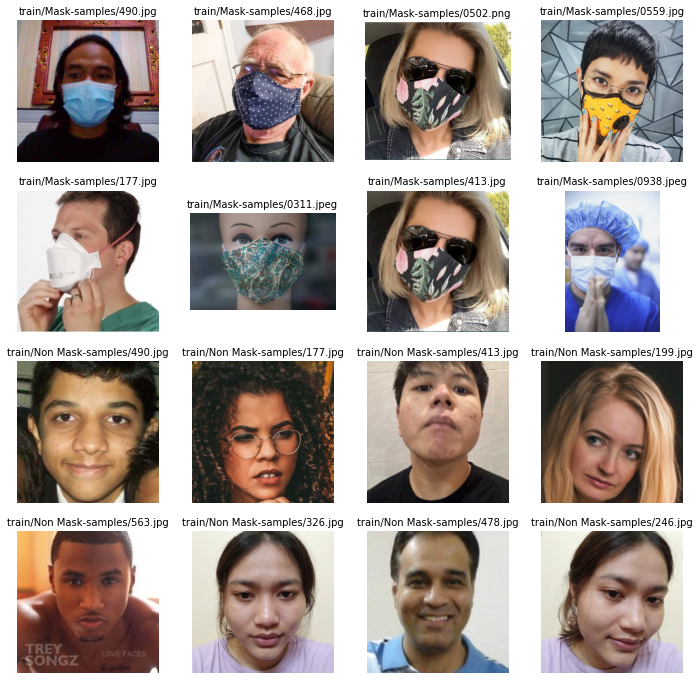

In [ ]:
import matplotlib.image as mpimg
nrows = 4
ncols = 4
plt.figure(figsize=(12,12))

mask_pic = []
for i in train_mask_names[0:8]:
  mask_pic.append(os.path.join(train_mask_dir,i))


nomask_pic = []
for i in train_nomask_names[0:8]:
  nomask_pic.append(os.path.join(train_nomask_dir,i))

print(mask_pic)
print(nomask_pic)

merged_list = mask_pic + nomask_pic

for i in range(0, len(merged_list)):
  data = merged_list[i].split('/', 4)[4]
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('Off')
  image = mpimg.imread(merged_list[i])
  sp.set_title(data, fontsize=10)
  plt.imshow(image, cmap='gray')

plt.show()

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   zoom_range = 0.2,
                                   rotation_range = 40,
                                   horizontal_flip = True 
                                   )
test_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary'
                                                    )
test_generator = test_datagen.flow_from_directory(test_dir,
                                                    target_size=(150,150),
                                                    batch_size = 1,
                                                    class_mode = 'binary'
                                                    )
valid_generator = valid_datagen.flow_from_directory(valid_dir,
                                                    target_size=(150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary'
                                                    )

Found 1688 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 422 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'Mask-samples': 0, 'Non Mask-samples': 1}

In [ ]:
train_generator.image_shape

(150, 150, 3)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding='SAME', activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3,3), padding='SAME', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 37, 37, 64)        0

In [ ]:
model.compile(Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# model.compile(Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    epochs = 30,
                    validation_data = valid_generator)

Epoch 1/30
53/53 [==============================] - 31s 403ms/step - loss: 1.5099 - accuracy: 0.6161 - val_loss: 0.5394 - val_accuracy: 0.9028
Epoch 2/30
53/53 [==============================] - 21s 397ms/step - loss: 0.3197 - accuracy: 0.8821 - val_loss: 0.3103 - val_accuracy: 0.9052
Epoch 3/30
53/53 [==============================] - 21s 393ms/step - loss: 0.2678 - accuracy: 0.9129 - val_loss: 0.2435 - val_accuracy: 0.9336
Epoch 4/30
53/53 [==============================] - 21s 395ms/step - loss: 0.2406 - accuracy: 0.9159 - val_loss: 0.2673 - val_accuracy: 0.9313
Epoch 5/30
53/53 [==============================] - 21s 400ms/step - loss: 0.2219 - accuracy: 0.9242 - val_loss: 0.1763 - val_accuracy: 0.9573
Epoch 6/30
53/53 [==============================] - 21s 396ms/step - loss: 0.2172 - accuracy: 0.9224 - val_loss: 0.1668 - val_accuracy: 0.9455
Epoch 7/30
53/53 [==============================] - 21s 396ms/step - loss: 0.2097 - accuracy: 0.9259 - val_loss: 0.1612 - val_accuracy: 0.9502

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
val_loss , val_acc = model.evaluate(valid_generator)
print('Val loss:{} Val acc:{}'.format(val_loss,val_acc))

14/14 [==============================] - 2s 145ms/step - loss: 0.1149 - accuracy: 0.9621
Val loss:0.11486336588859558 Val acc:0.9620853066444397


Text(0.5, 0, 'epoch')

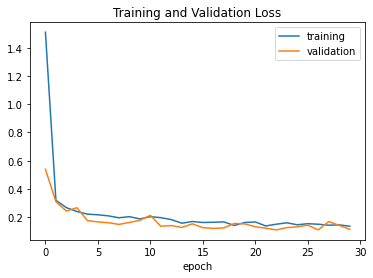

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

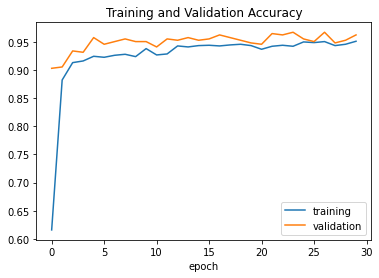

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Training and Validation Accuracy')
plt.xlabel('epoch')

In [ ]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                                    target_size=(150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary'
                                                    )

Found 100 images belonging to 2 classes.


In [ ]:
test_loss , test_acc = model.evaluate(test_generator)
print('test loss:{} test acc:{}'.format(test_loss,test_acc))

4/4 [==============================] - 1s 337ms/step - loss: 0.1183 - accuracy: 0.9600
test loss:0.11834301799535751 test acc:0.9599999785423279


In [ ]:
model.save('model.h5')

In [ ]:
shutil.copy("/content/model.h5", "/content/drive/MyDrive/DATASET/modelTrain/model8020_9600.h5")

'/content/drive/MyDrive/DATASET/modelTrain/model8020_9600.h5'

In [ ]:
shutil.copy("/content/drive/MyDrive/DATASET/modelTrain/model8020_9600.h5", "/content/model.h5")

'/content/model.h5'

#Confusion Matrix

In [ ]:
from numpy.core.records import recarray
from tensorflow.keras.models import load_model
from keras.preprocessing import image
from keras.preprocessing.image import load_img , img_to_array
import tensorflow as tf

In [ ]:
model =load_model('model.h5')

mask = '/content/content/Test/Mask'
no_mask = '/content/content/Test/Non Mask'

mf = os.listdir(mask)
nmf = os.listdir(no_mask)

In [ ]:
y_test = []
y_pred = []

In [ ]:
for fname in mf:
  if fname != ".DS_Store" :
    img_path = mask+"/"+fname
    img = image.load_img(img_path, target_size=(150,150))
    images = image.img_to_array(img)
    images = np.expand_dims(images, axis=0)
    prediction = model.predict(images)
    print(fname)
    if prediction == 0:
      pred = 0
      y_pred.append(pred)

    else:
      pred = 1
      y_pred.append(pred)
    
    y_test.append(0)


for fname in nmf:
  if fname != ".DS_Store" :
    img_path = no_mask+"/"+fname
    img = image.load_img(img_path, target_size=(150,150))
    images = image.img_to_array(img)
    images = np.expand_dims(images, axis=0)
    prediction = model.predict(images)
    print(fname)
    if prediction == 0:
      pred = 0
      y_pred.append(pred)

    else:
      pred = 1
      y_pred.append(pred)
    
    y_test.append(1)

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt


In [ ]:
labels = ['Mask', 'NonMask']

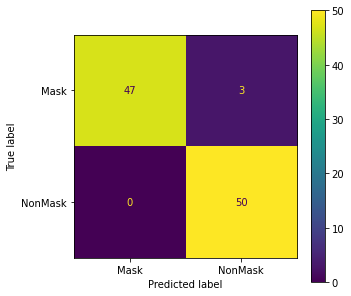

In [ ]:
mat = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=mat, display_labels=labels)

fig, ax = plt.subplots(figsize=(5,5))

disp.plot(ax = ax)
plt.show()

In [ ]:
accuracy_score(y_test, y_pred)

0.97

In [ ]:
precision_score(y_test, y_pred, average = None)

array([1.        , 0.94339623])

In [ ]:
recall_score(y_test, y_pred, average=None)

array([0.94, 1.  ])

In [ ]:
f1_score(y_test, y_pred, average=None)

#tesdoang

In [ ]:
from google.colab import files
from keras.preprocessing import image
uploaded = files.upload()
for fname in uploaded.keys():
  img_path = '/content/'+fname
  img = image.load_img(img_path, target_size=(150,150))
  images = image.img_to_array(img)
  images = np.expand_dims(images, axis=0)
  prediction = model.predict(images)
  print(fname)
  if prediction == 0:
    print('mask')

  else:
    print('no mask')


Saving Mask Group 8.png to Mask Group 8.png
Mask Group 8.png
mask
